In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dotenv
import os
import json
from message import Message
from data_load import *
import numpy as np


# Ensure that visuals appear inline in the notebook
%matplotlib inline

In [2]:
dotenv.load_dotenv()

messages_folder = os.getenv("MESSAGES_FOLDER_PATH")

messages, text_messages = load_messages_from_directory(messages_folder)

cleaned_text_messages = clean_and_filter_messages(text_messages, min_words=1)

features_tensor, sender_vector = extract_features_and_labels(cleaned_text_messages)

print(features_tensor.shape)
print(features_tensor[0])

Loading message_2.json
Loading message_3.json
Loading message_4.json
Loading message_5.json
Loading message_6.json
Loading message_1.json
torch.Size([56048, 12])
tensor([76.0000, 16.0000,  0.5000,  0.0000,  0.0000, 22.0000,  4.0000,  0.0000,
         4.0000, 59.0000,  0.7763,  3.8125])


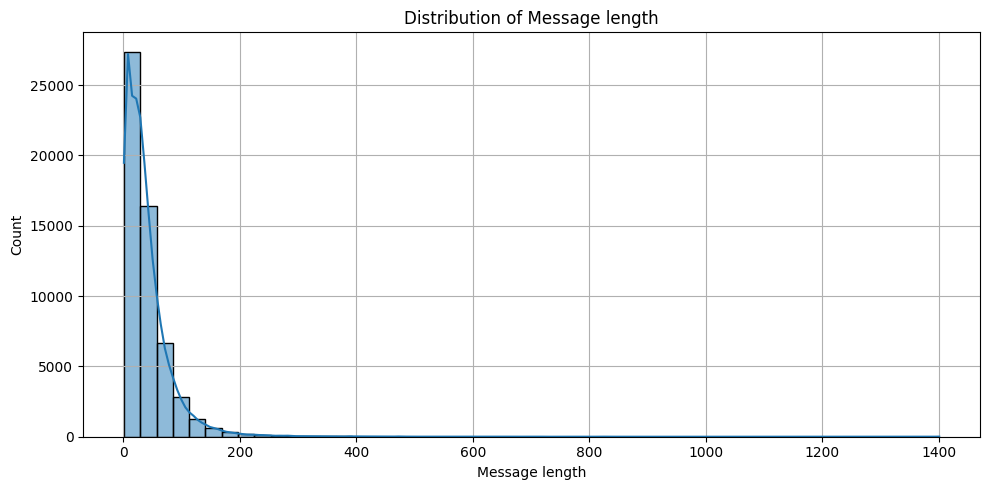

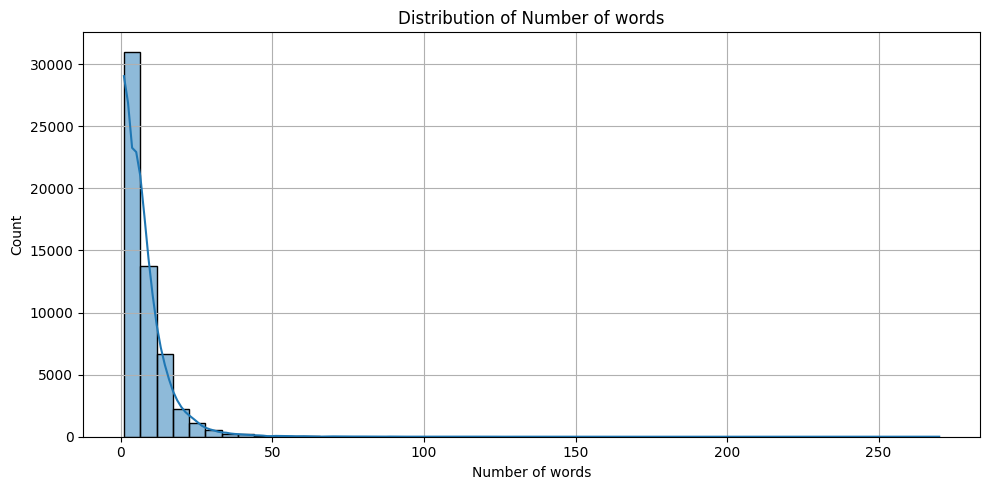

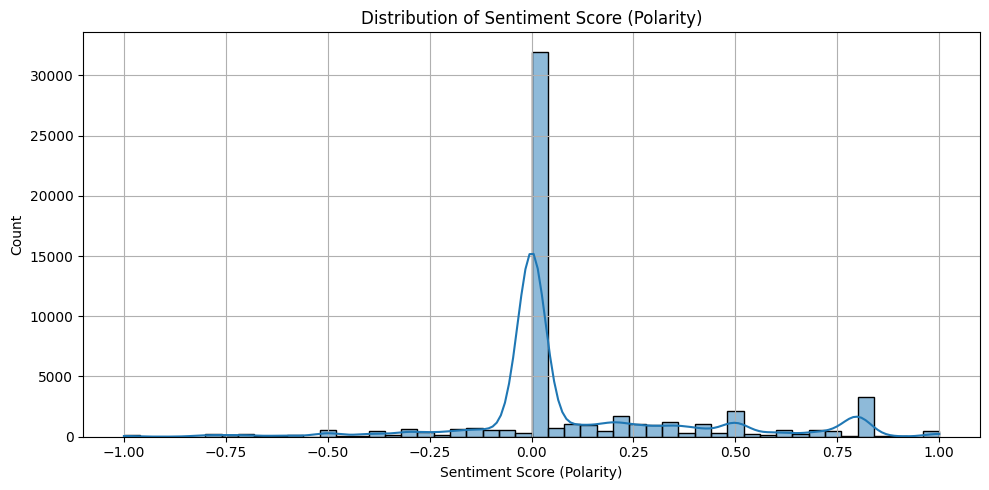

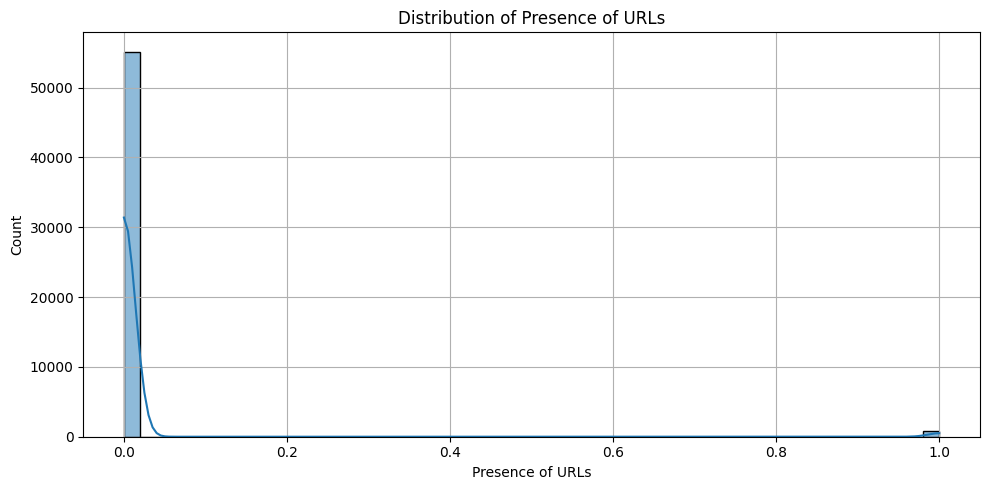

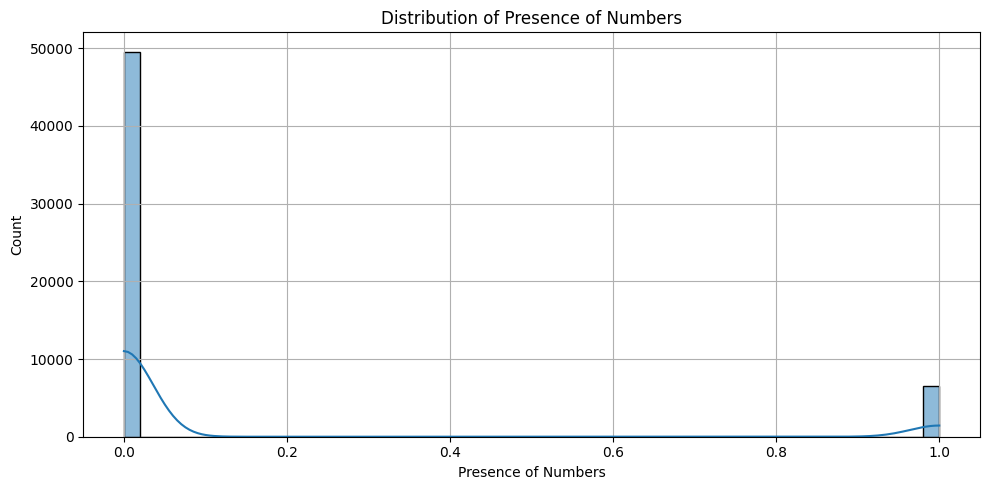

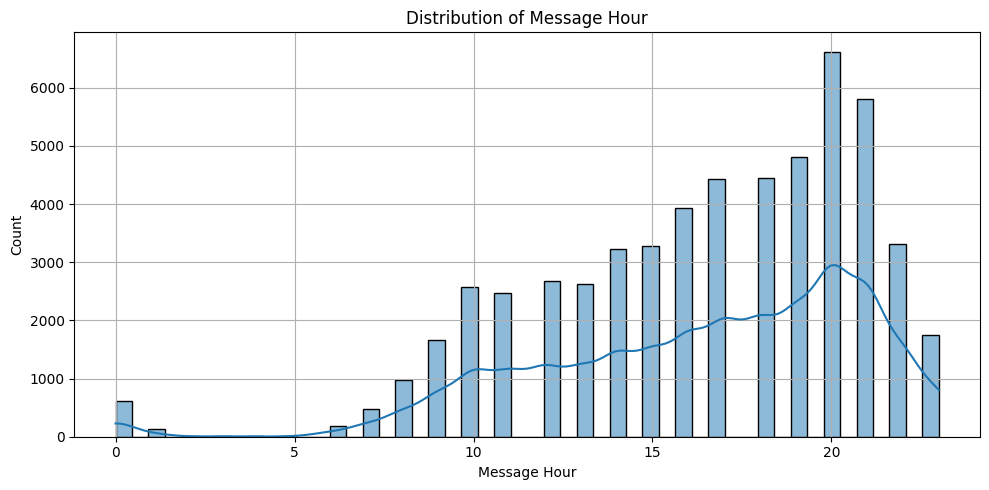

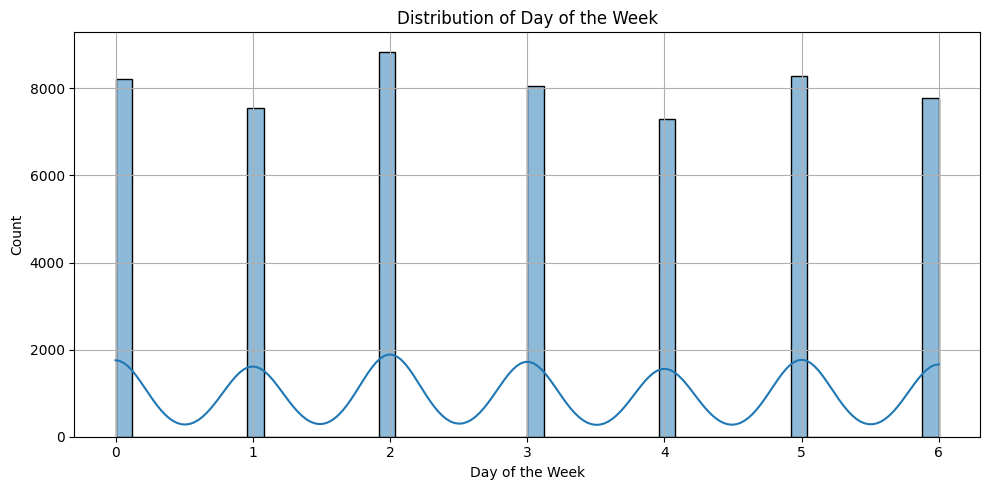

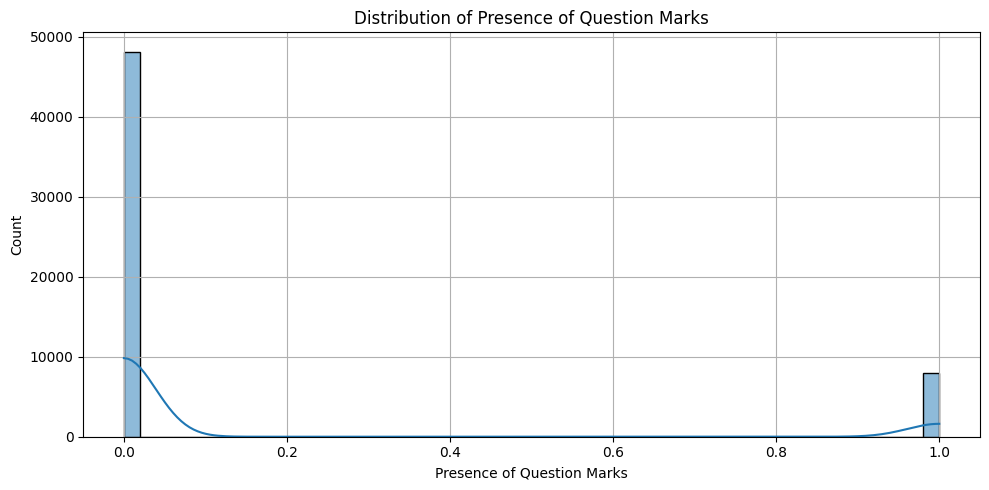

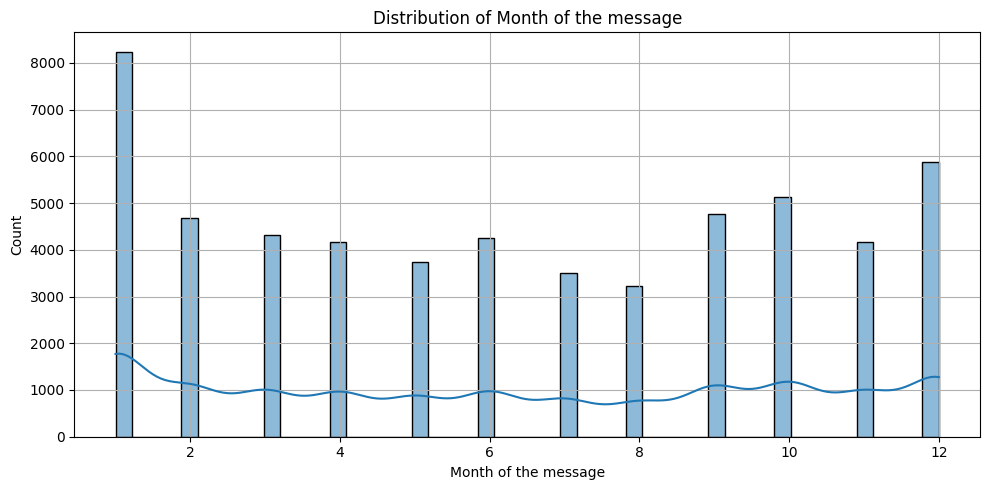

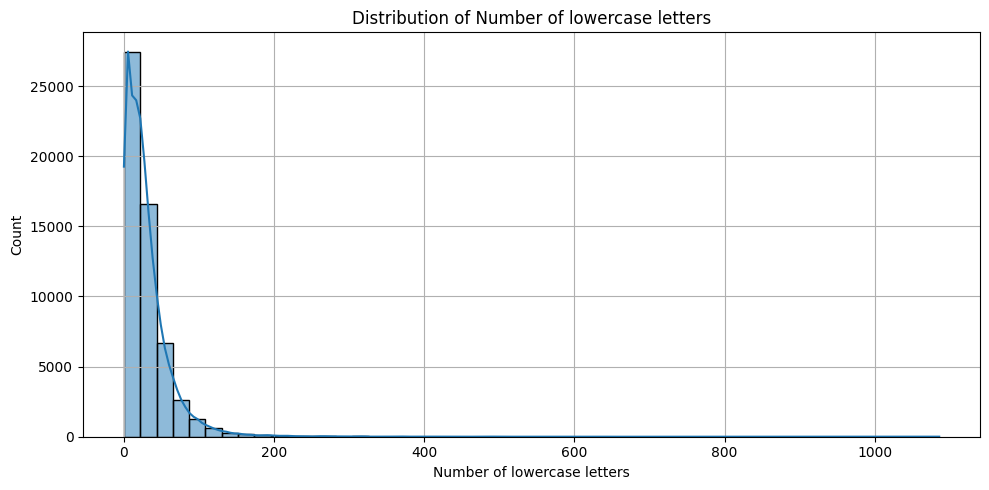

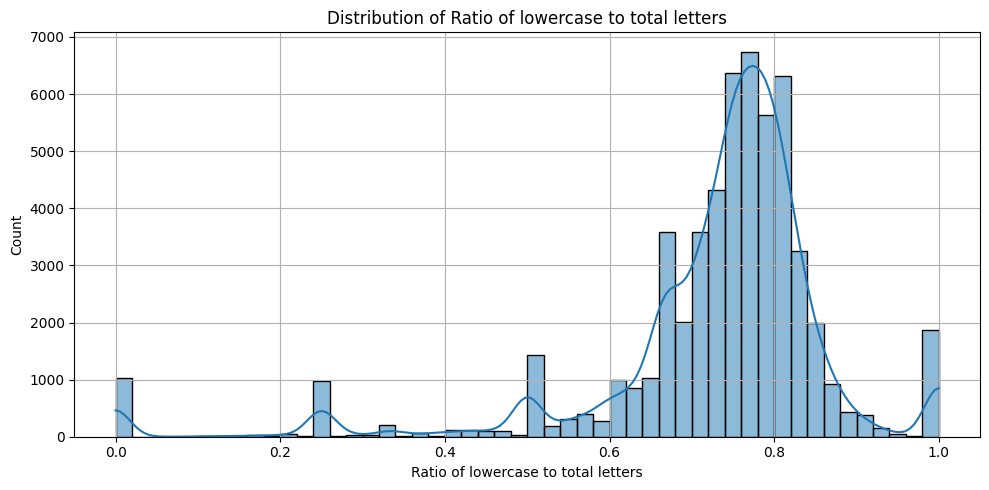

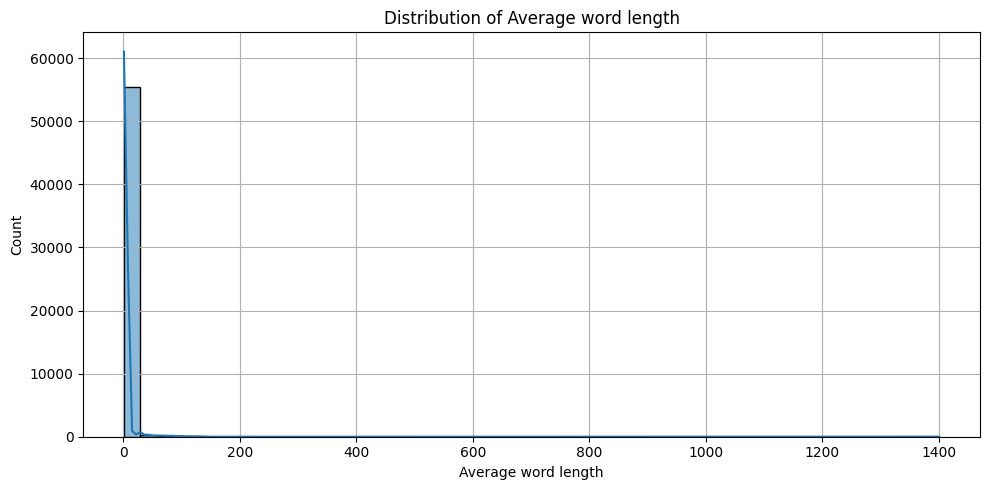

In [3]:
# Convert tensor to Pandas DataFrame
feature_headers = [
    "Message length", "Number of words", "Sentiment Score (Polarity)", "Presence of URLs",
    "Presence of Numbers", "Message Hour", "Day of the Week", "Presence of Question Marks",
    "Month of the message", "Number of lowercase letters", "Ratio of lowercase to total letters",
    "Average word length"
]
features_dataframe = pd.DataFrame(data=features_tensor.numpy(), columns=feature_headers)

# Plot distribution of each feature
for header in feature_headers:
    plt.figure(figsize=(10, 5))
    sns.histplot(features_dataframe[header], bins=50, kde=True)
    plt.title(f'Distribution of {header}')
    plt.xlabel(header)
    plt.ylabel('Count')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [4]:
# Sort the DataFrame based on 'Message length' in descending order and take the top 10 rows
top_10_longest = features_dataframe.sort_values(by='Message length', ascending=False).head(50)

# Print the lengths
print("Top 50 Longest Messages by Length:")
for idx, row in top_10_longest.iterrows():
    print(f"Message Index: {idx}, Message Length: {row['Message length']}")


Top 50 Longest Messages by Length:
Message Index: 21559, Message Length: 1401.0
Message Index: 474, Message Length: 1401.0
Message Index: 18616, Message Length: 1401.0
Message Index: 10365, Message Length: 1401.0
Message Index: 21556, Message Length: 1288.0
Message Index: 49314, Message Length: 1040.0
Message Index: 52792, Message Length: 984.0
Message Index: 52833, Message Length: 850.0
Message Index: 53177, Message Length: 823.0
Message Index: 54700, Message Length: 823.0
Message Index: 38338, Message Length: 817.0
Message Index: 12444, Message Length: 792.0
Message Index: 45921, Message Length: 775.0
Message Index: 51831, Message Length: 743.0
Message Index: 51897, Message Length: 715.0
Message Index: 6442, Message Length: 713.0
Message Index: 24822, Message Length: 712.0
Message Index: 17663, Message Length: 708.0
Message Index: 12499, Message Length: 702.0
Message Index: 49338, Message Length: 698.0
Message Index: 51106, Message Length: 679.0
Message Index: 43336, Message Length: 

In [5]:
def extract_emoji_from_encoded(s):
    """
    Convert encoded strings like '\u00f0\u009f\u0087\u00b0' to the proper hex representation of the emoji.
    """
    # Split string by "\u00" and remove empty strings from resulting list
    parts = s.split("\\u00")[1:]
    
    # Extract the last two characters from each part
    hex_string = ''.join([p[-2:] for p in parts])
    
    return hex_string

encoded_string = "\\u00f0\\u009f\\u0087\\u00b0"
print(extract_emoji_from_encoded(encoded_string))  # Output: f09f87b0

def hex_to_emoji(hex_string):
    bytes_repr = bytes.fromhex(hex_string)
    return bytes_repr.decode('utf-8')

print(hex_to_emoji(extract_emoji_from_encoded(encoded_string)))  # This will print the emoji


f09f87b0
🇰
